In [1]:
import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display
import pypianoroll
from music_theory_utils import make_dicts,inversion

In [2]:
key_name_dicts,chord_name_dicts = make_dicts()
chord_name_dicts = {key:inversion(np.array(val),course=48) for key,val in chord_name_dicts.items() }

In [3]:
quaver_tri   = 1
quaver_reso  = quaver_tri * 3 #8部音符の解像度
quarter_tri  = quaver_tri * 2 
quarter_reso = quarter_tri * 3  # 4部音符の解像度 
bar_reso     = quarter_reso * 4 # 1小節の解像度
bar_num      = 8     # 小節数
all_reso     = bar_num * bar_reso # 8 * 24
tempo        = 120    #bpm

pitch_reso = 128    # 鍵盤の数

tempos = tempo*np.ones( [all_reso,1] )

In [4]:
multitrack   = pypianoroll.Multitrack(resolution=quarter_reso,tempo=tempos)

### make chord track

In [5]:
track1 = pypianoroll.StandardTrack(name="piano",program=0,is_drum=False)
multitrack.tracks.append(track1)

In [6]:
chords = ["C","G","Am7","Em7","F","C","F9","G7"]

描画

In [7]:
pianoroll = np.zeros( [all_reso,pitch_reso] ,dtype=np.uint8)
for bar in range(8):
    start =   bar * bar_reso
    end   = ( bar+1 )*bar_reso
    
    chord = chord_name_dicts[chords[bar]]
    pianoroll[start:end,chord] = 127
    pianoroll[start:end,chord[0] - 12] = 127 # ベース音の追加

track1.pianoroll = pianoroll

[<AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>]

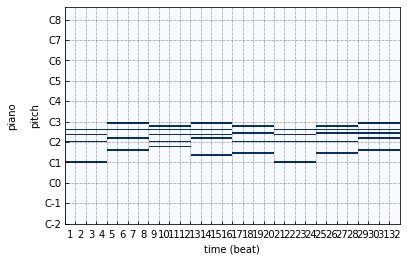

In [8]:
#plt.figure()
multitrack.plot()

### make melody track

####  make motif

In [9]:
#8部(20%) 4部(60%) or ４部休符(10%) or 8部休符(10%)

In [10]:
def make_motief():
    events_choice = {"quarter_note":0.6,"quaver_note":0.3,"quarter_rest":0.05,"quaver_rest":0.05}
    events_array  = {"quarter_note":[quarter_reso,127],"quaver_note":[quaver_reso,127],
                    "quarter_rest":[quarter_reso,0],  "quaver_rest":[quaver_reso,0]  }

    pentas_keys  = ["C","D","E","G","A"]
    octave_nums  = ["4","5"]
    pentas_choice = {i+j:1/(len(pentas_keys)*len(octave_nums)) for i in pentas_keys for j in octave_nums}

    bar_pianoroll = np.zeros([bar_reso,pitch_reso])
    events_list = []
    note_start = 0
    note_end   = 0

    while 1:
        #
        event = np.random.choice(list( events_choice.keys()) ,p=list(events_choice.values()),replace=True)
        note_dulation,note_velocity =  events_array[event]
        note_end   = note_start + note_dulation

        if (note_end) >= bar_reso:
            break 
        
        melo  = np.random.choice( list(pentas_choice.keys()),p=list(pentas_choice.values()),replace=True)
        pitch = key_name_dicts[melo]

        bar_pianoroll[note_start:note_end,pitch] = note_velocity
        note_start = note_end
        events_list.append([event,pitch])
    return bar_pianoroll

In [11]:
bar_pianoroll = make_motief()
verse_pre = np.tile(bar_pianoroll,(3,1))
verse_break = make_motief()

In [12]:
pianoroll = np.concatenate([verse_pre,verse_break])
pianoroll = np.tile(pianoroll,(2,1))
track2 = pypianoroll.StandardTrack(name="piano",program=12,is_drum=False)

In [13]:
multitrack.tracks.append(track2)
track2.pianoroll = pianoroll

[<AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>,
 <AxesSubplot:xlabel='time (beat)', ylabel='piano\n\npitch'>]

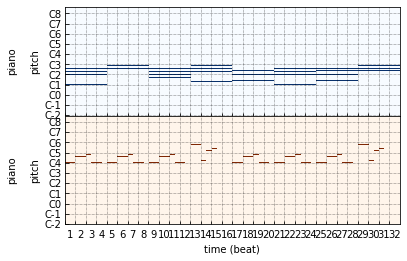

In [14]:
multitrack.plot()

In [15]:
pm = multitrack.to_pretty_midi()

In [16]:
pm.write('gggg.midi')

In [17]:
IPython.display.Audio(pm.fluidsynth(fs=16000), rate=16000)

In [ ]:
pm = pretty_midi.PrettyMIDI(initial_tempo=80)

In [ ]:
inst = pretty_midi.Instrument(program=33, is_drum=False, name='my guitar')
pm.instruments.append(inst)

In [ ]:
# Let's add a few notes to our instrument
velocity = 100
for pitch, start, end in zip([60, 62, 64], [0.2, 0.6, 1.0], [1.1, 1.7, 2.3]):
    inst.notes.append(pretty_midi.Note(velocity, pitch, start, end))
print(inst.notes)

In [ ]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 56, 70)
# Note the blurry section between 1.5s and 2.3s - that's the pitch bending up!

In [ ]:
# Create a PrettyMIDI object
cello_c_chord = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Cello')
cello = pretty_midi.Instrument(program=cello_program)
# Iterate over note names, which will be converted to note number later
for note_name in ['C5', 'E5', 'G5']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance, starting at 0s and ending at .5s
    note = pretty_midi.Note(
        velocity=100, pitch=note_number, start=0, end=.5)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_c_chord.instruments.append(cello)
# Write out the MIDI data
cello_c_chord.write('cello-C-chord.mid')

In [ ]:

plt.figure(figsize=(8, 4))
plot_piano_roll(cello_c_chord, 56, 90)

In [ ]:
IPython.display.Audio(cello_c_chord.fluidsynth(fs=16000), rate=16000)
# Sounds (kind of) like a cello!